<div align=center>
<font face="XB Niloofar">
<font size=4>
گزارش آزمایش اول
<p></p>
<font size=4>
فرهاد فلاح 97102214 
<p></p>


In [1]:
import numpy as np
import cv2
import os 
from skimage import io,color
import matplotlib.pyplot as plt
import random
import pandas as pd



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
خواندن داده ها

In [2]:
path = 'Cohn-Kanade\\neutral'
data = dict()
data['img'] = []
data['person'] =[]
persons = []
for file in os.listdir(path):
    img = io.imread(path+ "\\"+ file,as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    data['img'].append(img_1d)
    person = file[1:4]
    data['person'].append(person)
data = pd.DataFrame.from_dict(data)
data


img person
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    010
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    010
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    011
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    011
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    014
..                                                 ...    ...
185  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    136
186  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    137
187  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    137
188  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    138
189  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    138

[190 rows x 2 columns]

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:بخش اول
<p></p>
<font size=4>
testو  train تقسیم داده های 

In [3]:
persons = data['person']
persons_unique = list(set(persons))
train_set = []
test_set = []
i=1
for choose in persons_unique:
    choose_data = data[data["person"] == choose]
    img = list(choose_data['img'])
    #print(choose_data)
    if i<70:
        train_set.append(img[0])
        try:
            train_set.append(img[1])
        except:
            x=5
    else:
        test_set.append(img[0])
        try:
            test_set.append(img[1])
        except:
            x=5
    i=i+1

train_set = np.array(train_set)
test_set = np.array(test_set)
print(train_set.shape)
print (test_set.shape)

(136, 180000)
(54, 180000)


In [4]:
persons_unique

['075',
 '103',
 '010',
 '089',
 '055',
 '059',
 '037',
 '093',
 '088',
 '105',
 '137',
 '034',
 '042',
 '044',
 '136',
 '054',
 '067',
 '079',
 '046',
 '130',
 '135',
 '117',
 '110',
 '052',
 '014',
 '107',
 '058',
 '064',
 '116',
 '062',
 '056',
 '084',
 '092',
 '087',
 '077',
 '026',
 '115',
 '113',
 '121',
 '078',
 '068',
 '098',
 '095',
 '097',
 '124',
 '063',
 '101',
 '094',
 '131',
 '112',
 '061',
 '073',
 '070',
 '071',
 '051',
 '102',
 '125',
 '053',
 '060',
 '127',
 '072',
 '065',
 '091',
 '066',
 '099',
 '132',
 '118',
 '082',
 '035',
 '080',
 '109',
 '138',
 '022',
 '104',
 '086',
 '106',
 '114',
 '108',
 '119',
 '120',
 '111',
 '045',
 '050',
 '076',
 '083',
 '057',
 '133',
 '081',
 '074',
 '069',
 '096',
 '032',
 '100',
 '134',
 '122',
 '011',
 '085']

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:بخش دوم
<p></p>
<font size=4>
استخراج 10 مقدار ویژه برتر

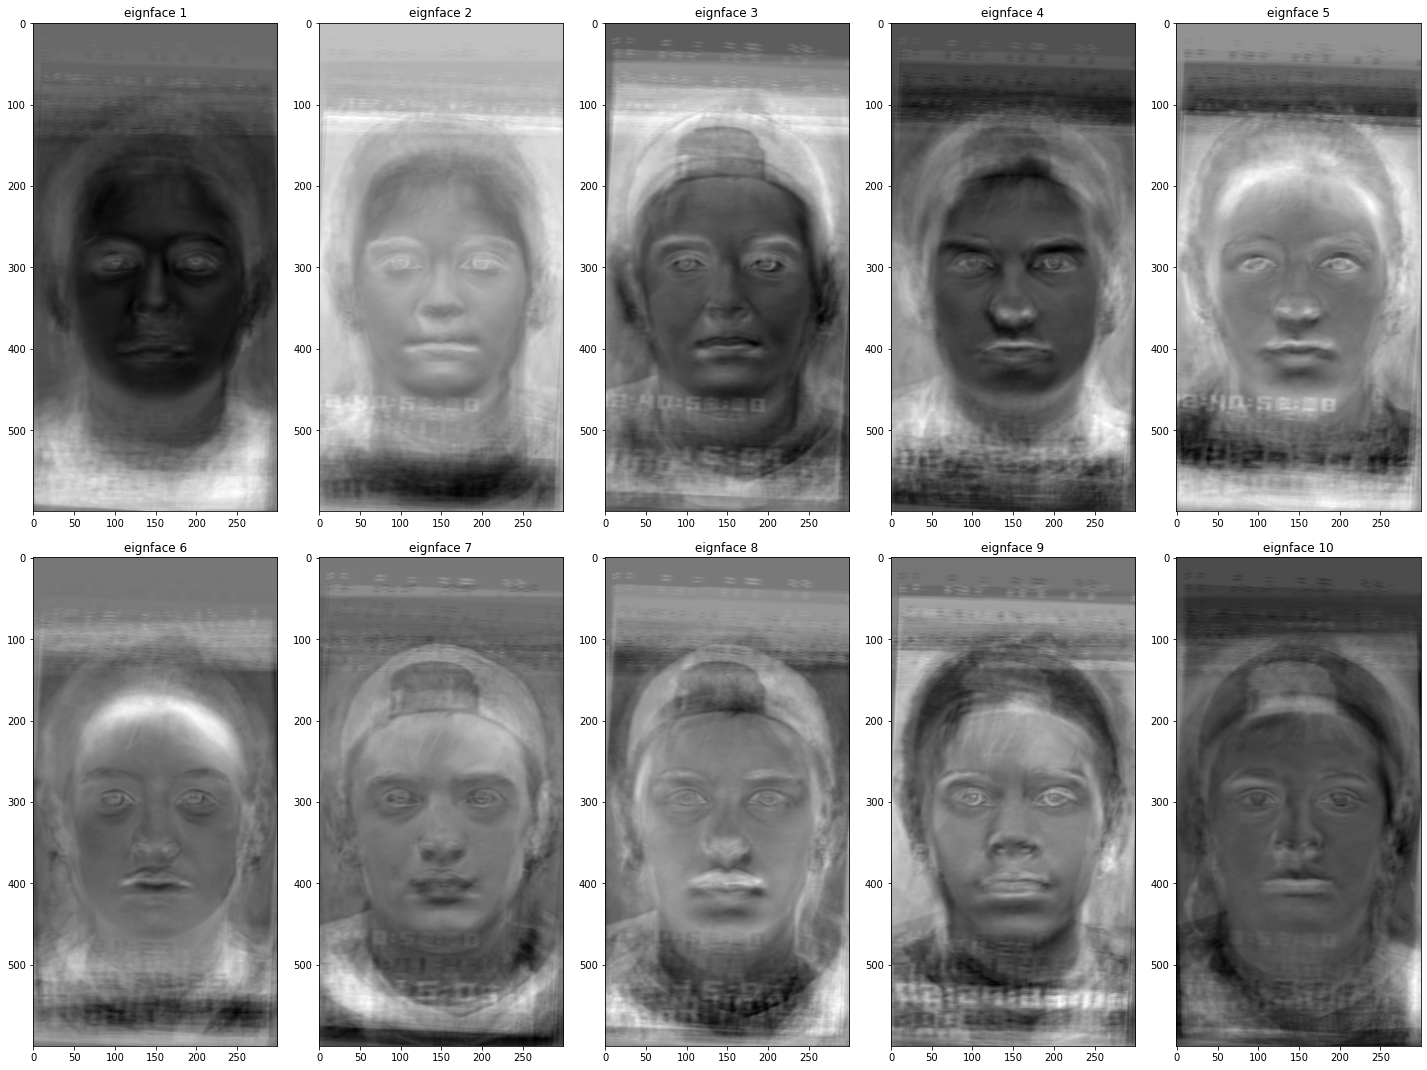

In [6]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=10)
pca1.fit(train_set)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)
fig.tight_layout()
i = 0
for eignface in pca1.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(2, 5, i+1)
    plt.title('eignface '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1
    


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:بخش سوم
<p></p>
<font size=4>
انتخاب 5 تصویر از داده ی آموزش و مقایسه تصویر با تصویر در فضای کاهش یافته و تصویر باز سازی شده

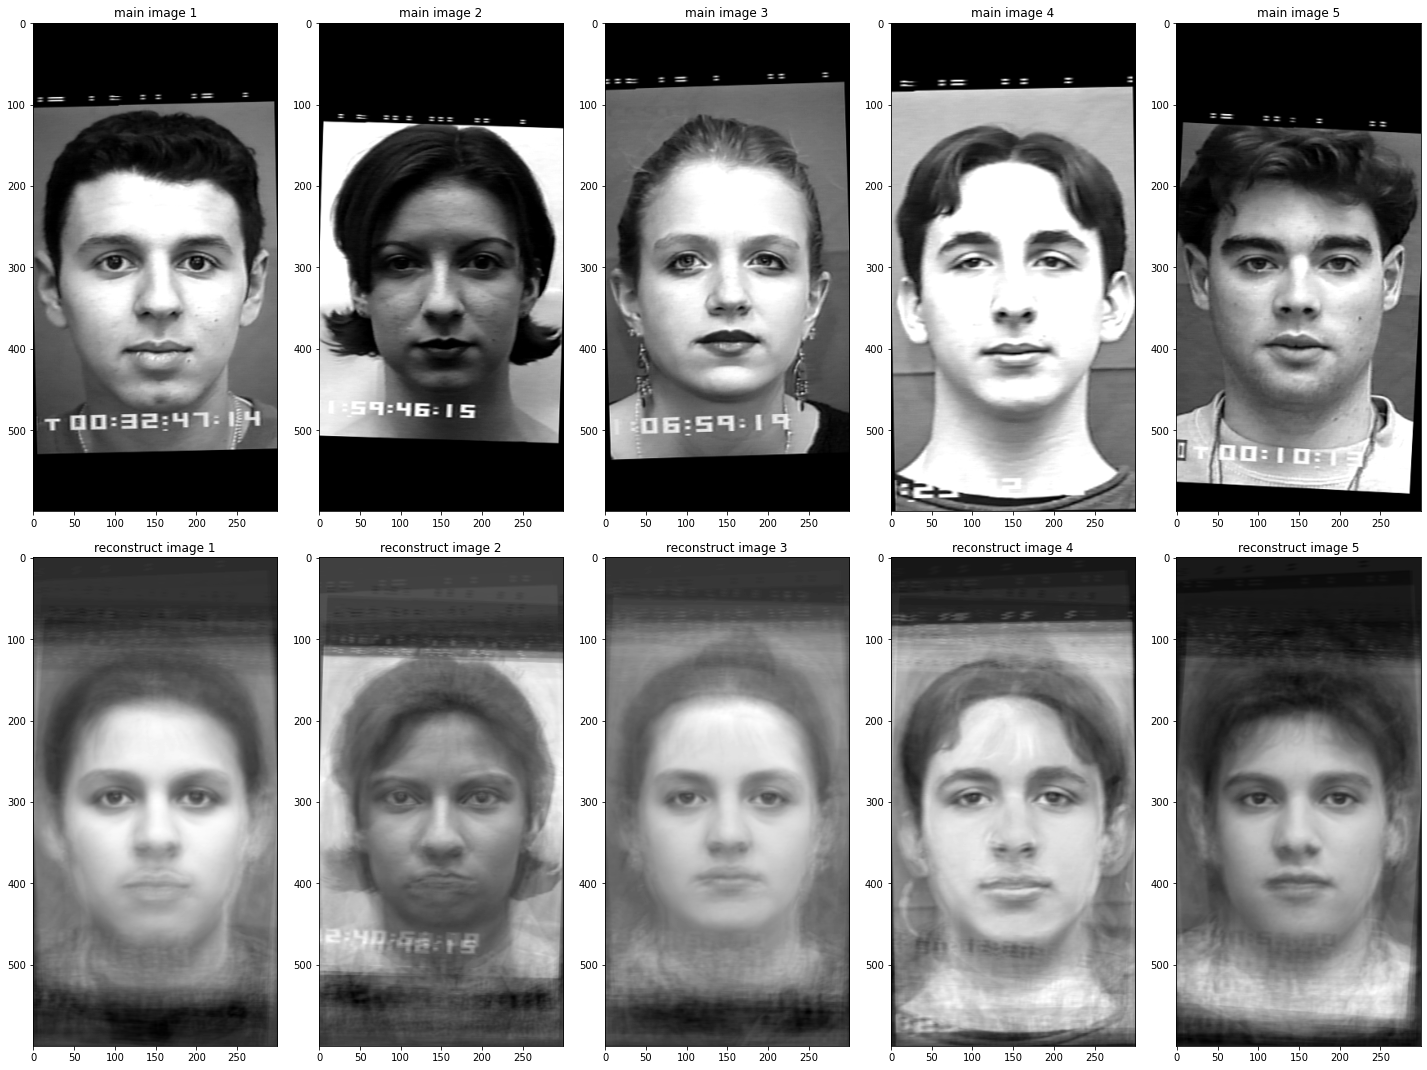

In [6]:
samples = train_set[1:20:4]
samples_reduced = pca1.transform(samples)
samples_reconstruct = pca1.inverse_transform(samples_reduced)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)
fig.tight_layout()

for i in range(5):
       
    sample = samples[i].reshape((rows,cols))
    plt.subplot(2, 5, i+1)
    plt.title('main image '+str(i+1))
    plt.imshow(sample, cmap='gray')
    
    '''sample_red = samples_reduced[i]
    img = 0
    for j in range(pca1.components_.shape[0]):
        img = img + sample_red[j]*pca1.components_[j]
    img = img.reshape((rows,cols))
    plt.subplot(3, 5, i+6)
    plt.title('reduced image '+
              str(i+1))
    plt.imshow(img, cmap='gray')'''
    
    
    sample_rec = samples_reconstruct[i].reshape((rows,cols))
    plt.subplot(2, 5, i+6)
    plt.title('reconstruct image '+
              str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    i+=1


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:بخش چهارم
<p></p>
<font size=4>
دو بخش قبل را برای 20 مقدار ویژه تکرار میکنیم، مشاهده میشود در این حالت و به خصوص برای تصاویر ستون 2و4 تصاویر بازسازی شده واضح تر است و علت آن این است که با افزایش تعداد مقادیر ویژه جزییات بیشتری از تصاویر حفظ میشود 

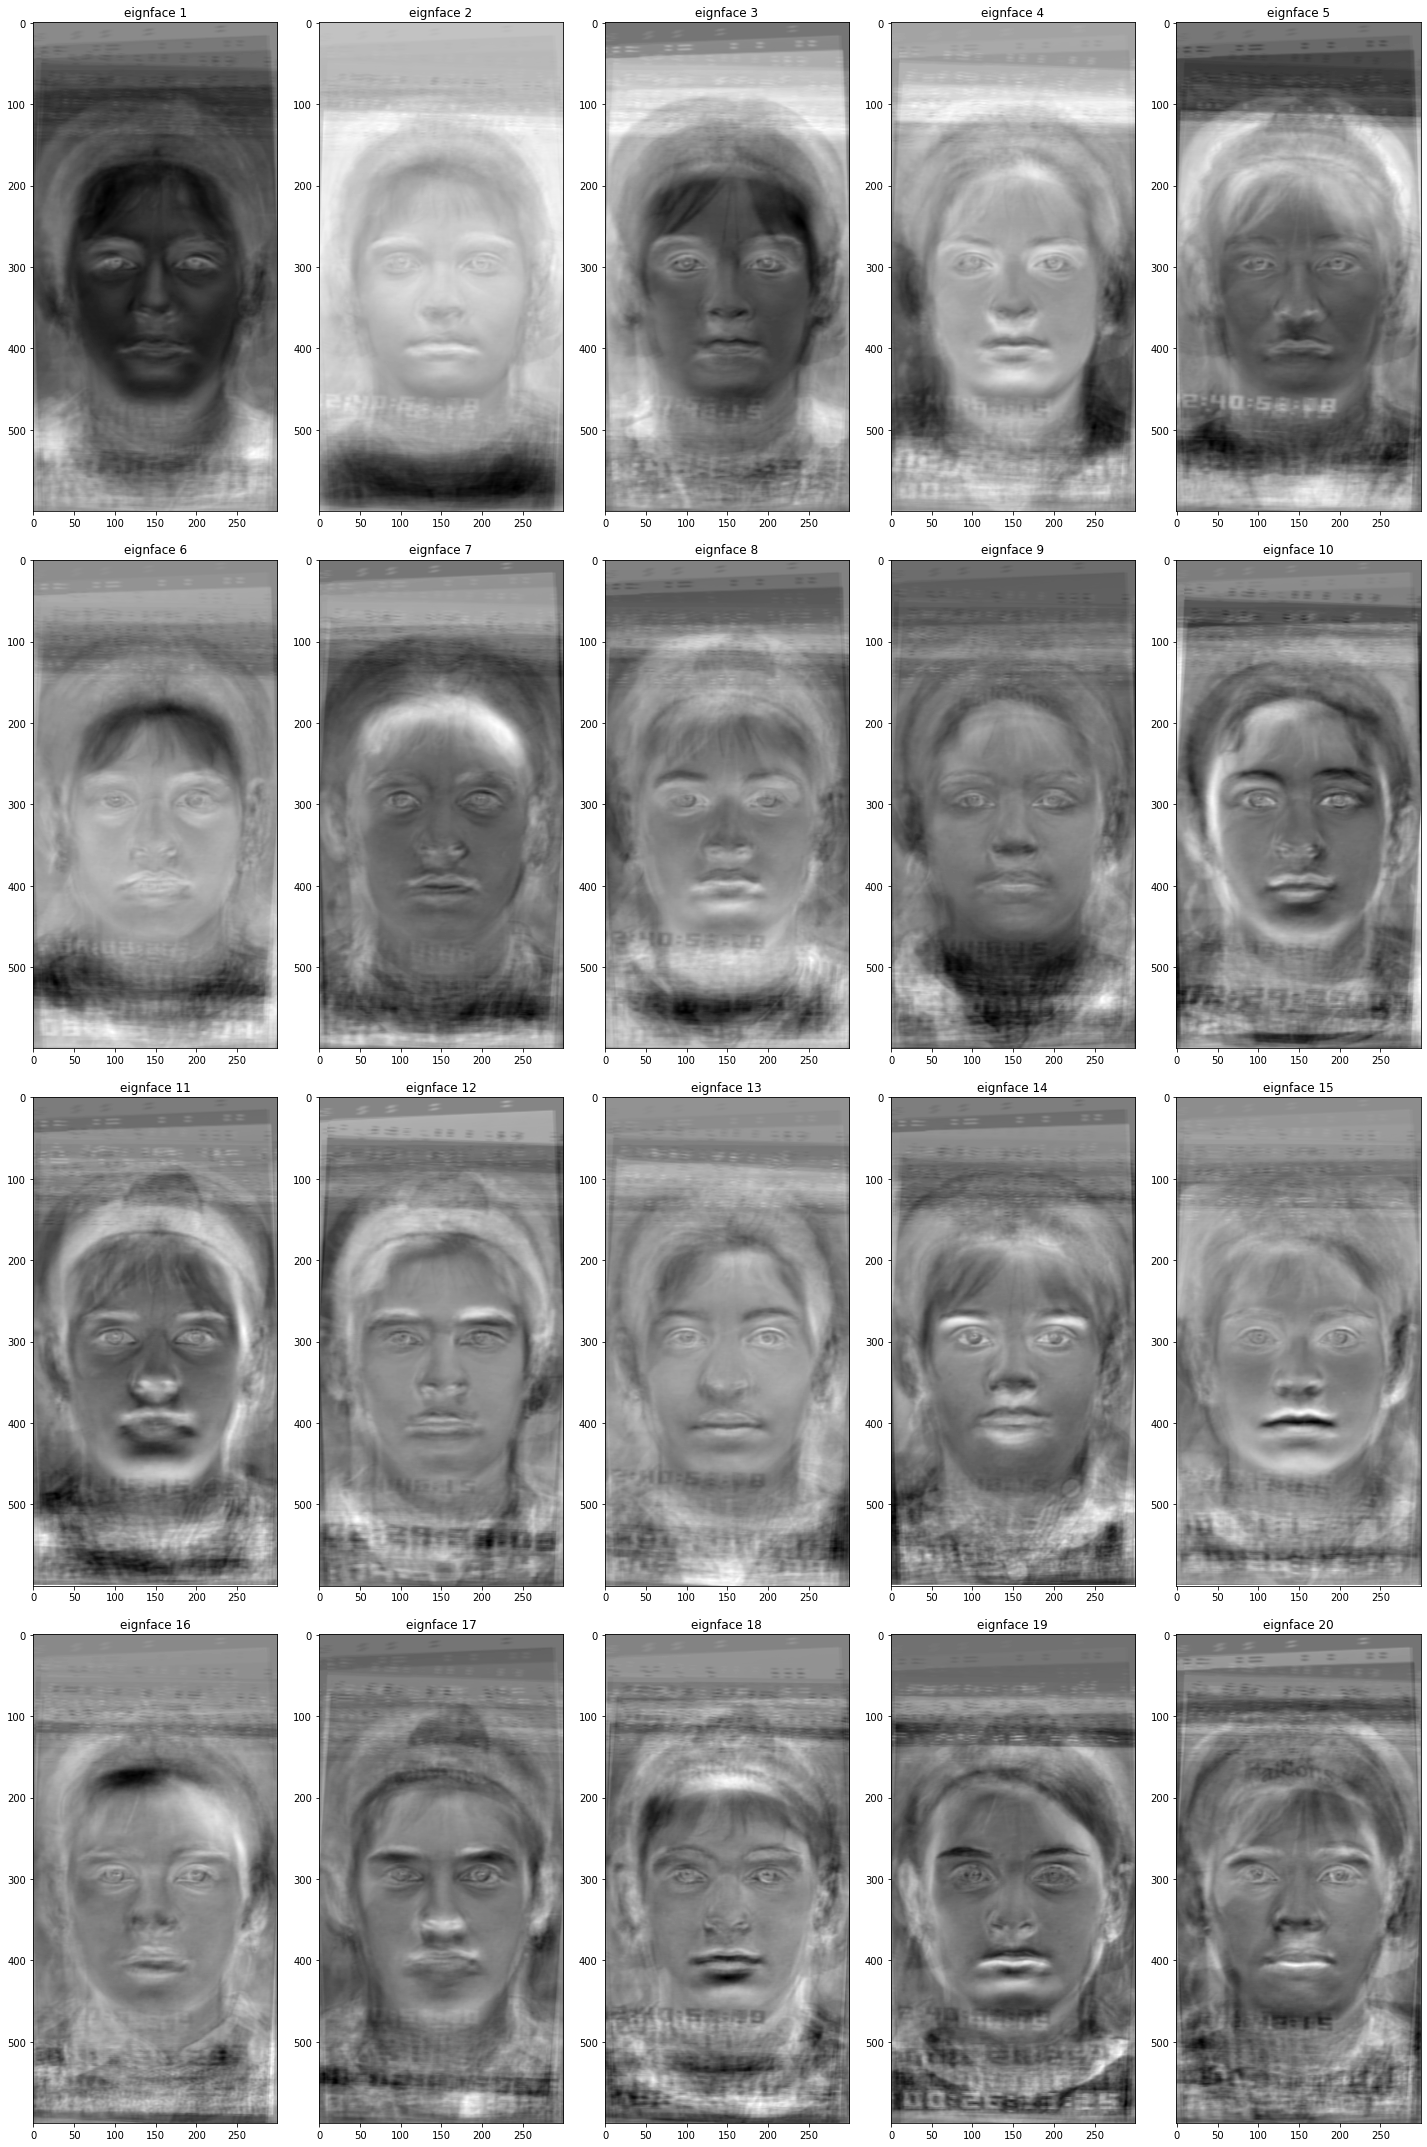

In [25]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=20)
pca2.fit(train_set)
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(20,30)
fig.tight_layout()
i = 0
for eignface in pca2.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(4, 5, i+1)
    plt.title('eignface '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1

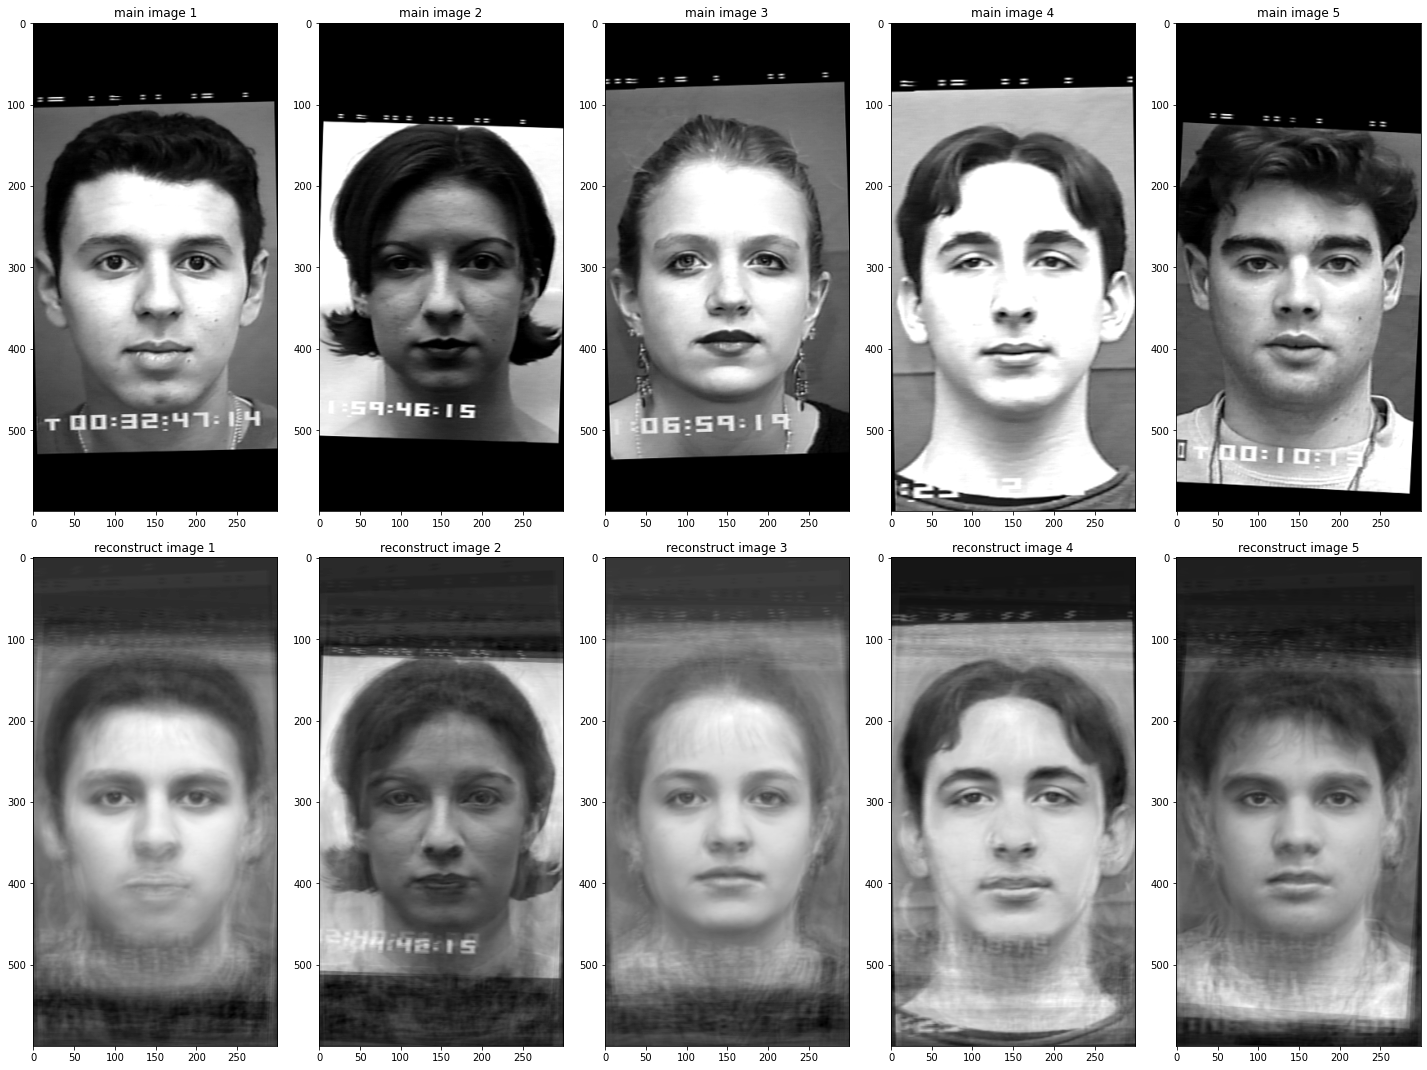

In [8]:
samples = train_set[1:20:4]
samples_reduced = pca2.transform(samples)
samples_reconstruct = pca2.inverse_transform(samples_reduced)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)
fig.tight_layout()

for i in range(5):
       
    sample = samples[i].reshape((rows,cols))
    plt.subplot(2, 5, i+1)
    plt.title('main image '+str(i+1))
    plt.imshow(sample, cmap='gray')
    
    '''sample_red = samples_reduced[i]
    img = 0
    for j in range(pca2.components_.shape[0]):
        img = img + sample_red[j]*pca2.components_[j]
    img = img.reshape((rows,cols))
    plt.subplot(3, 5, i+6)
    plt.title('reduced image '+ str(i+1))
    plt.imshow(img, cmap='gray')
    '''
    
    sample_rec = samples_reconstruct[i].reshape((rows,cols))
    plt.subplot(2, 5, i+6)
    plt.title('reconstruct image '+ str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    i+=1

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:بخش پنجم
<p></p>
<font size=4>
     این کار را برای داده های مجموعه تست هم آزمایش میکنیم، دقت کار به اندازه بخش آموزش نیست اما باز هم تصاویر بازسازی شده از 20 مقدار ویژه نزدیکی بیشتری به داده ی اولیه دارند

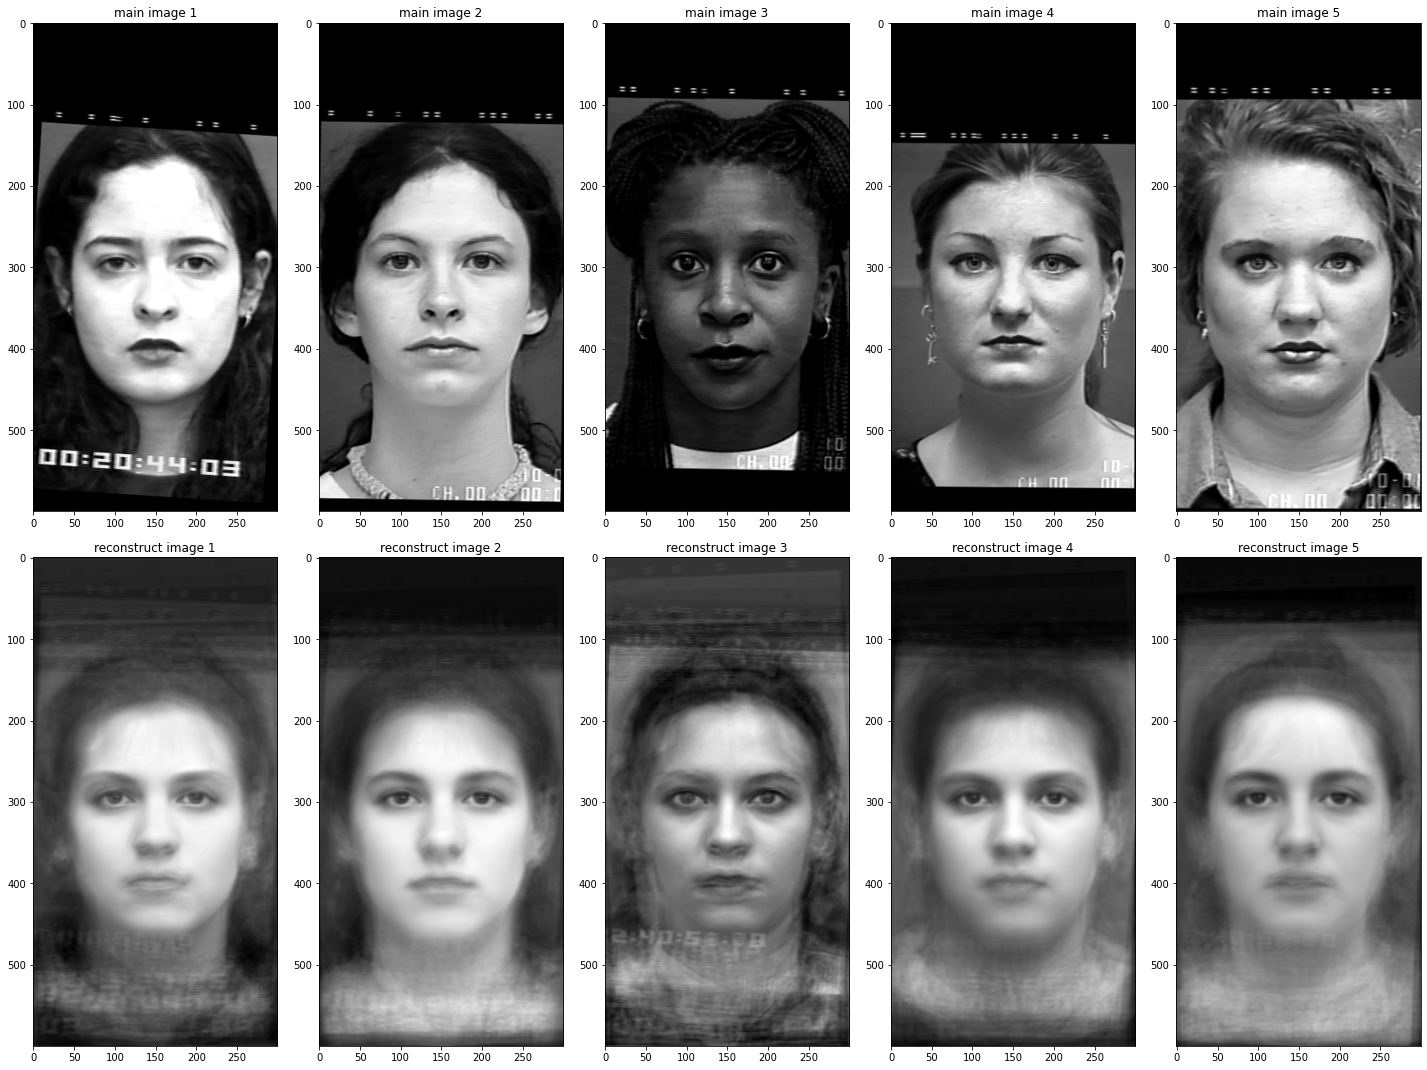

In [27]:
samples = test_set[1:20:4]
samples_reduced = pca1.transform(samples)
samples_reconstruct = pca1.inverse_transform(samples_reduced)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)
fig.tight_layout()

for i in range(5):
       
    sample = samples[i].reshape((rows,cols))
    plt.subplot(2, 5, i+1)
    plt.title('main image '+str(i+1))
    plt.imshow(sample, cmap='gray')
    
    '''sample_red = samples_reduced[i]
    img = 0
    for j in range(pca1.components_.shape[0]):
        img = img + sample_red[j]*pca1.components_[j]
    img = img.reshape((rows,cols))
    plt.subplot(3, 5, i+6)
    plt.title('reduced image '+ str(i+1))
    plt.imshow(img, cmap='gray')'''
    
    
    sample_rec = samples_reconstruct[i].reshape((rows,cols))
    plt.subplot(2, 5, i+6)
    plt.title('reconstruct image '+ str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    i+=1

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
<p></p>
<font size=4>
    خروجی برای 20 مقدار ویژه برتر

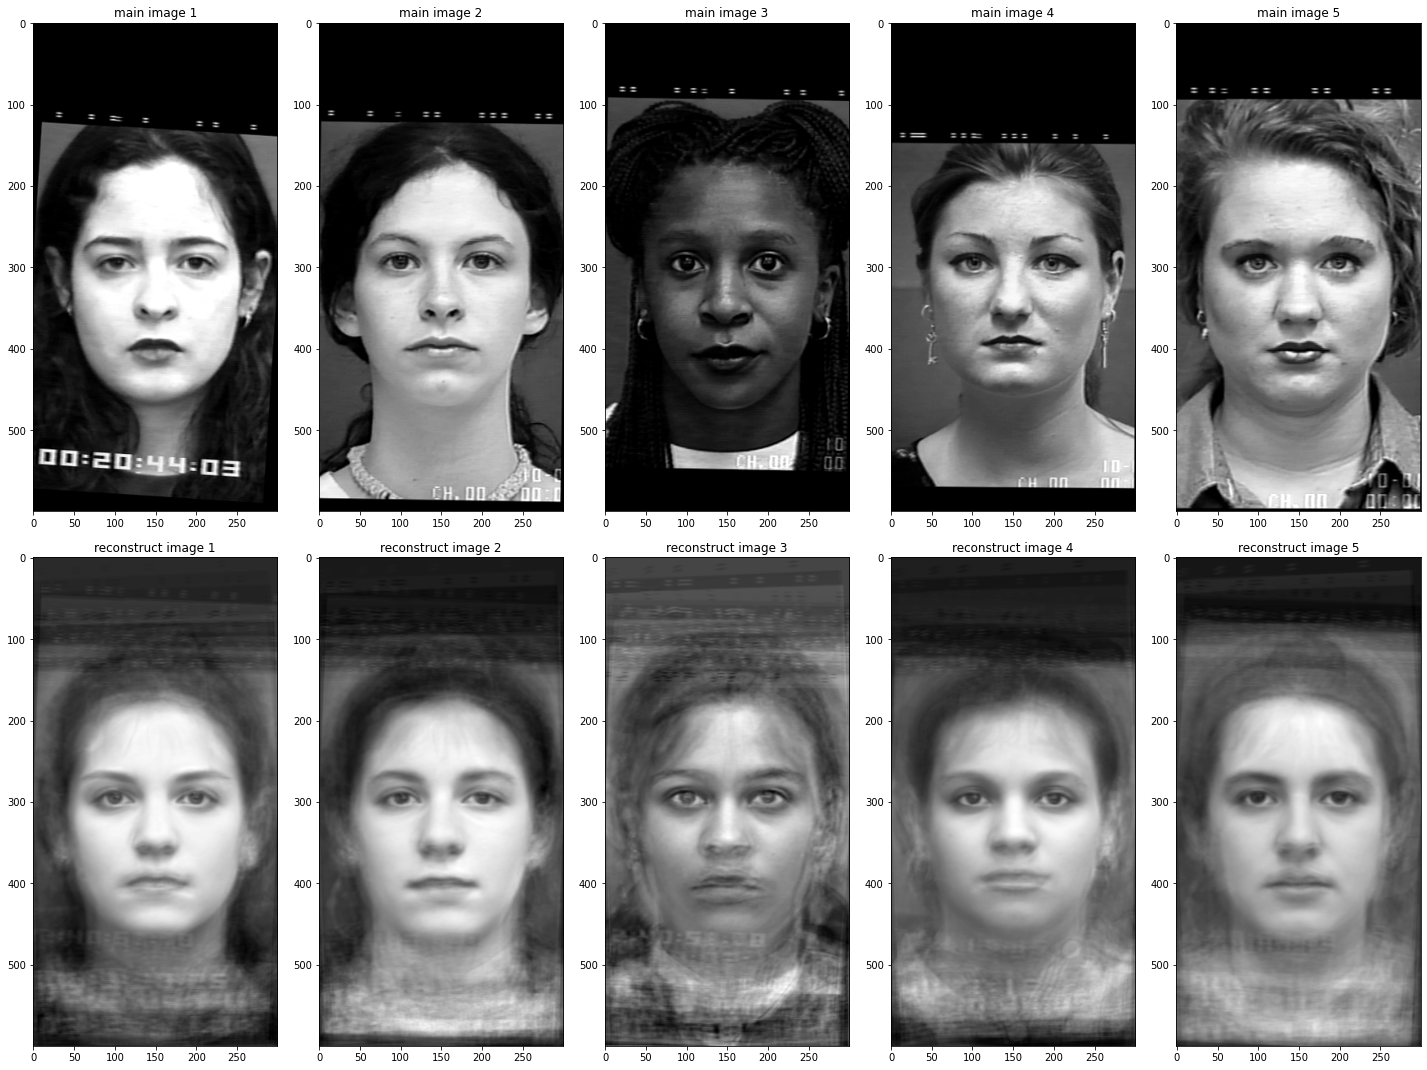

In [29]:
samples = test_set[1:20:4]
samples_reduced = pca2.transform(samples)
samples_reconstruct = pca2.inverse_transform(samples_reduced)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)
fig.tight_layout()

for i in range(5):
       
    sample = samples[i].reshape((rows,cols))
    plt.subplot(2, 5, i+1)
    plt.title('main image '+str(i+1))
    plt.imshow(sample, cmap='gray')
    
    '''sample_red = samples_reduced[i]
    img = 0
    for j in range(pca2.components_.shape[0]):
        img = img + sample_red[j]*pca2.components_[j]
    img = img.reshape((rows,cols))
    plt.subplot(3, 5, i+6)
    plt.title('reduced image '+ str(i+1))
    plt.imshow(img, cmap='gray')'''
    
    
    sample_rec = samples_reconstruct[i].reshape((rows,cols))
    plt.subplot(2, 5, i+6)
    plt.title('reconstruct image '+ str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    i+=1

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:قسمت سوم
<p></p>
<font size=5 ,bold>
بخش اول
<p></p>
<font size=4>
    ابتدا نصاویر هر دسته را می خوانیم.

In [11]:
path = 'Cohn-Kanade\\neutral'
data_neutral = dict()
data_neutral['img'] = []
data_neutral['person'] =[]
persons_neutral = []
for file in os.listdir(path):
    img = io.imread(path+ "\\"+ file,as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    data_neutral['img'].append(img_1d)
    person_neutral = file[1:4]
    data_neutral['person'].append(person_neutral)
data_neutral = pd.DataFrame.from_dict(data_neutral)


path = 'Cohn-Kanade\\happy'
data_happy = dict()
data_happy['img'] = []
data_happy['person'] =[]
persons_happy = []
for file in os.listdir(path):
    img = io.imread(path+ "\\"+ file,as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    data_happy['img'].append(img_1d)
    person_happy = file[1:4]
    data_happy['person'].append(person_happy)
data_happy = pd.DataFrame.from_dict(data_happy)

path = 'Cohn-Kanade\\surprise'
data_surprise = dict()
data_surprise['img'] = []
data_surprise['person'] =[]
persons_surprise = []
for file in os.listdir(path):
    img = io.imread(path+ "\\"+ file,as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    data_surprise['img'].append(img_1d)
    person_surprise = file[1:4]
    data_surprise['person'].append(person_surprise)
data_surprise = pd.DataFrame.from_dict(data_surprise)


path = 'Cohn-Kanade\\disgust'
data_disgust = dict()
data_disgust['img'] = []
data_disgust['person'] =[]
persons_disgust = []
for file in os.listdir(path):
    img = io.imread(path+ "\\"+ file,as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    data_disgust['img'].append(img_1d)
    person_disgust = file[1:4]
    data_disgust['person'].append(person_disgust)
data_disgust = pd.DataFrame.from_dict(data_disgust)


<div align=right>
<font face="XB Niloofar">
<font size=4>
   حال ماسکی برای پوشاندن قسمت های اضافی تصویر درست می کنیم

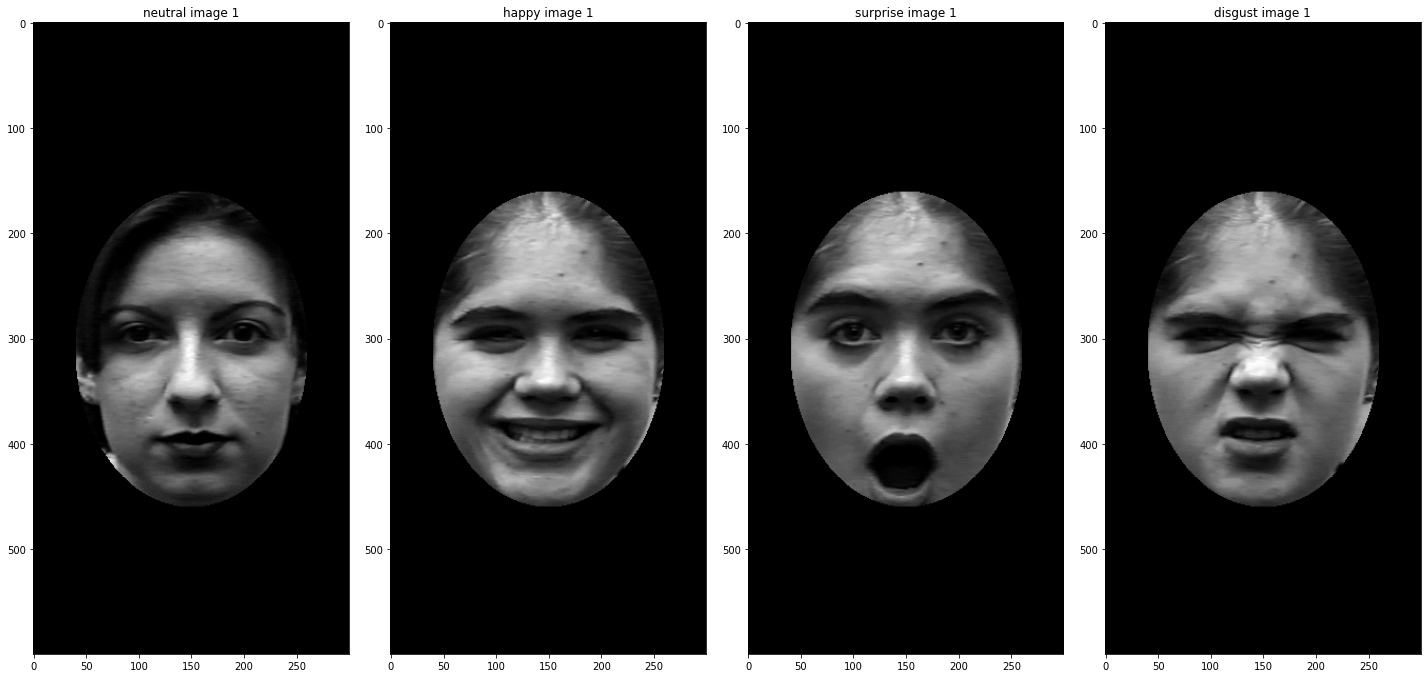

In [12]:
Mask=np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        if (((i-310)**2)/(150**2)) + (((j-150)**2)/(110**2)) < 1:
            Mask[i,j]=1


fig, axes = plt.subplots(1, 4)
fig.set_size_inches(20,15)
fig.tight_layout()

plt.subplot(1,4,1)
sample = data_neutral['img'][1].reshape((rows,cols))
plt.title('neutral image '+str(1))
plt.imshow(Mask*sample, cmap='gray')

plt.subplot(1,4,2)
sample = data_happy['img'][1].reshape((rows,cols))
plt.title('happy image '+str(1))
plt.imshow(Mask*sample, cmap='gray')

plt.subplot(1,4,3)
sample = data_surprise['img'][1].reshape((rows,cols))
plt.title('surprise image '+str(1))
plt.imshow(Mask*sample, cmap='gray')

plt.subplot(1,4,4)
sample = data_disgust['img'][1].reshape((rows,cols))
plt.title('disgust image '+str(1))
plt.imshow(Mask*sample, cmap='gray')
               

<div align=right>
<font face="XB Niloofar">
<font size=4>
   حال ابتدا ماسک را بر روی همه تصاویر اعمال می کنیم سپس 20مقدار ویژه برتر را استخراج کرده و برای هر گروه احساسی نمایش میدهیم

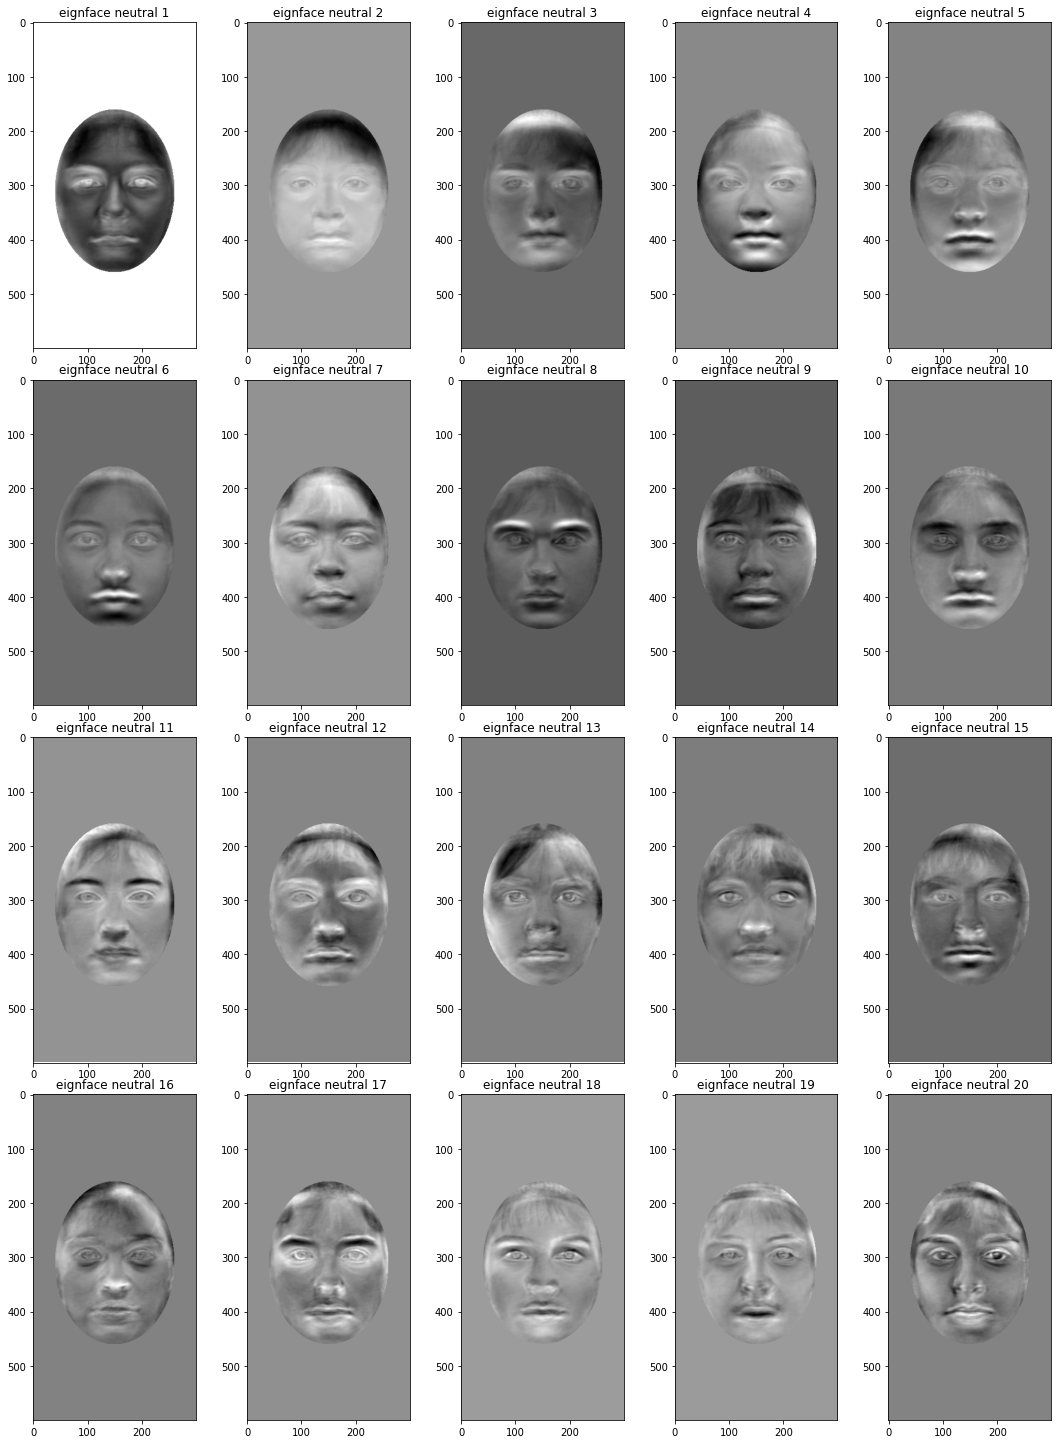

In [37]:
persons = data_neutral['person']
persons_unique = list(set(persons))
train_neutral_set = []
i=1
for choose in persons_unique:
    choose_data = data_neutral[data_neutral["person"] == choose]
    img = list(choose_data['img'])
    train_neutral_set.append(img[0]* Mask.reshape(rows*cols))
    try:
         train_neutral_set.append(img[1]* Mask.reshape(rows*cols))
    except:
         x=5
    i=i+1

train_neutral_set = np.array(train_neutral_set)

pca1_neutral = PCA(n_components=20)
pca1_neutral.fit(train_neutral_set)
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(15,20)
fig.tight_layout()
i = 0
for eignface in pca1_neutral.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(4, 5, i+1)
    plt.title('eignface neutral '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1

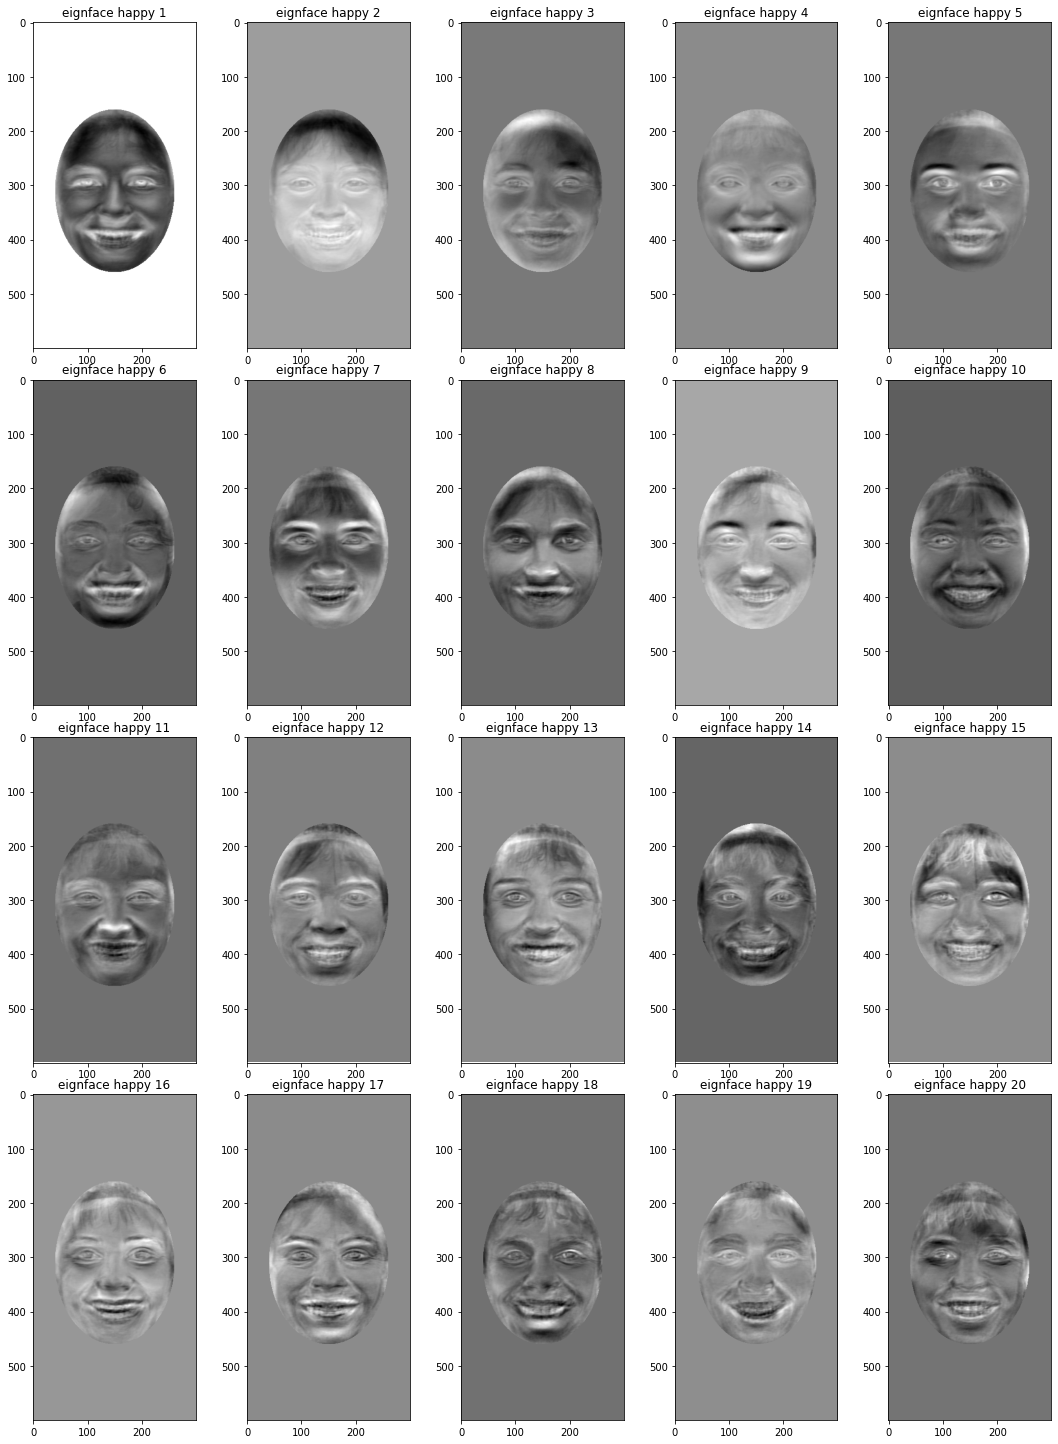

In [38]:
persons = data_happy['person']
persons_unique = list(set(persons))
train_happy_set = []
i=1
for choose in persons_unique:
    choose_data = data_happy[data_happy["person"] == choose]
    img = list(choose_data['img'])
    train_happy_set.append(img[0]* Mask.reshape(rows*cols))
    try:
         train_happy_set.append(img[1]* Mask.reshape(rows*cols))
    except:
         x=5
    i=i+1

train_happy_set = np.array(train_happy_set)

pca1_happy = PCA(n_components=20)
pca1_happy.fit(train_happy_set)
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(15,20)
fig.tight_layout()
i = 0
for eignface in pca1_happy.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(4, 5, i+1)
    plt.title('eignface happy '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1

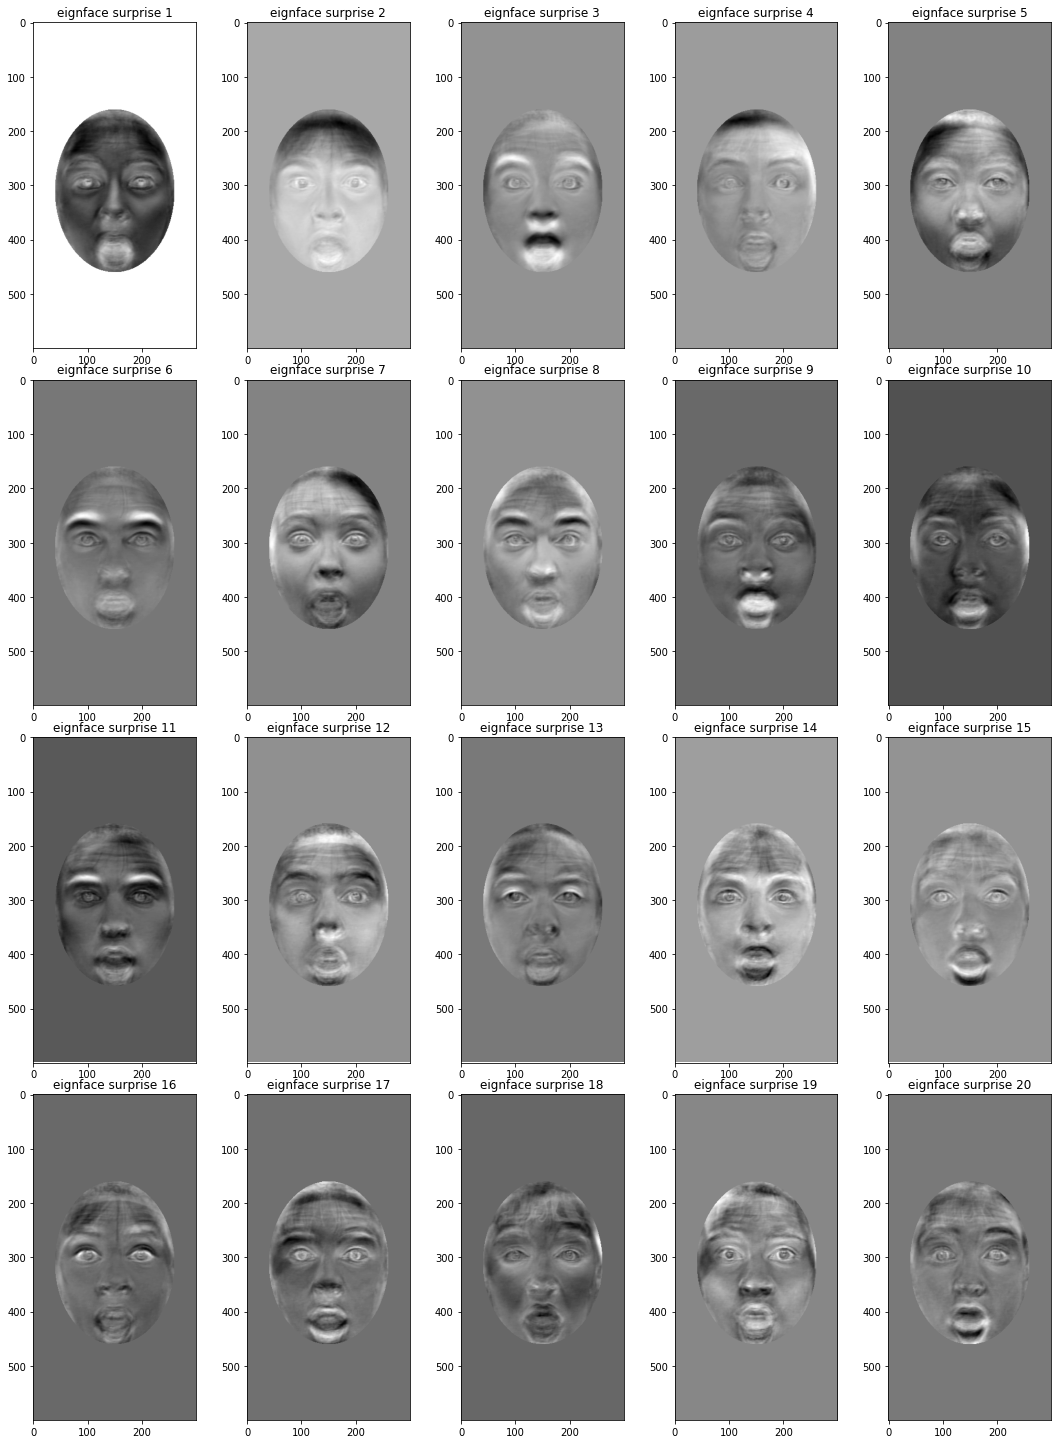

In [39]:
persons = data_surprise['person']
persons_unique = list(set(persons))
train_surprise_set = []
i=1
for choose in persons_unique:
    choose_data = data_surprise[data_surprise["person"] == choose]
    img = list(choose_data['img'])
    train_surprise_set.append(img[0]* Mask.reshape(rows*cols))
    try:
         train_surprise_set.append(img[1]* Mask.reshape(rows*cols))
    except:
         x=5
    i=i+1

train_surprise_set = np.array(train_surprise_set)

pca1_surprise = PCA(n_components=20)
pca1_surprise.fit(train_surprise_set)
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(15,20)
fig.tight_layout()
i = 0
for eignface in pca1_surprise.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(4, 5, i+1)
    plt.title('eignface surprise '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1

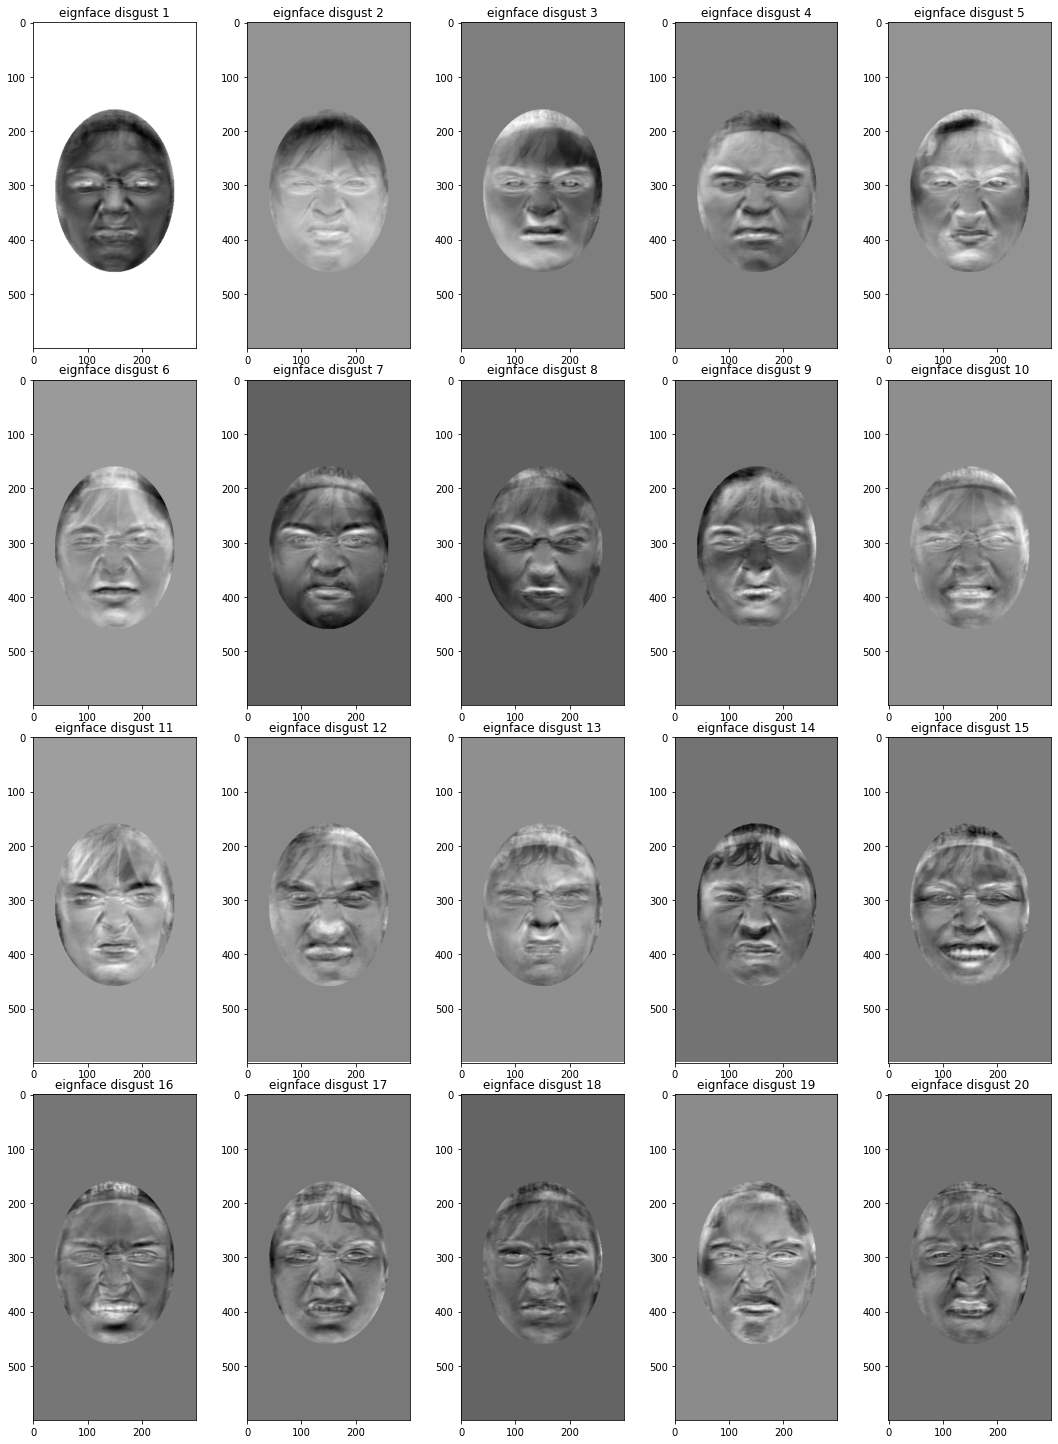

In [40]:
persons = data_disgust['person']
persons_unique = list(set(persons))
train_disgust_set = []
i=1
for choose in persons_unique:
    choose_data = data_disgust[data_disgust["person"] == choose]
    img = list(choose_data['img'])
    train_disgust_set.append(img[0]* Mask.reshape(rows*cols))
    try:
         train_disgust_set.append(img[1]* Mask.reshape(rows*cols))
    except:
         x=5
    i=i+1

train_disgust_set = np.array(train_disgust_set)

pca1_disgust = PCA(n_components=20)
pca1_disgust.fit(train_disgust_set)
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(15,20)
fig.tight_layout()
i = 0
for eignface in pca1_disgust.components_:
   
    #eignface = normalize(eignface) *255
    img = eignface.reshape((rows,cols))
    plt.subplot(4, 5, i+1)
    plt.title('eignface disgust '+str(i+1))
    plt.imshow(img, cmap='gray')
    i+=1

<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
:قسمت سوم
<p></p>
<font size=5 ,bold>
بخش دوم
<p></p>
<font size=4>
حال که برای هر زیرفضا مقادیر آنرا محاسبه کردیم، ده تصویر خواسته شده را انتخاب و اعمال میکنیم

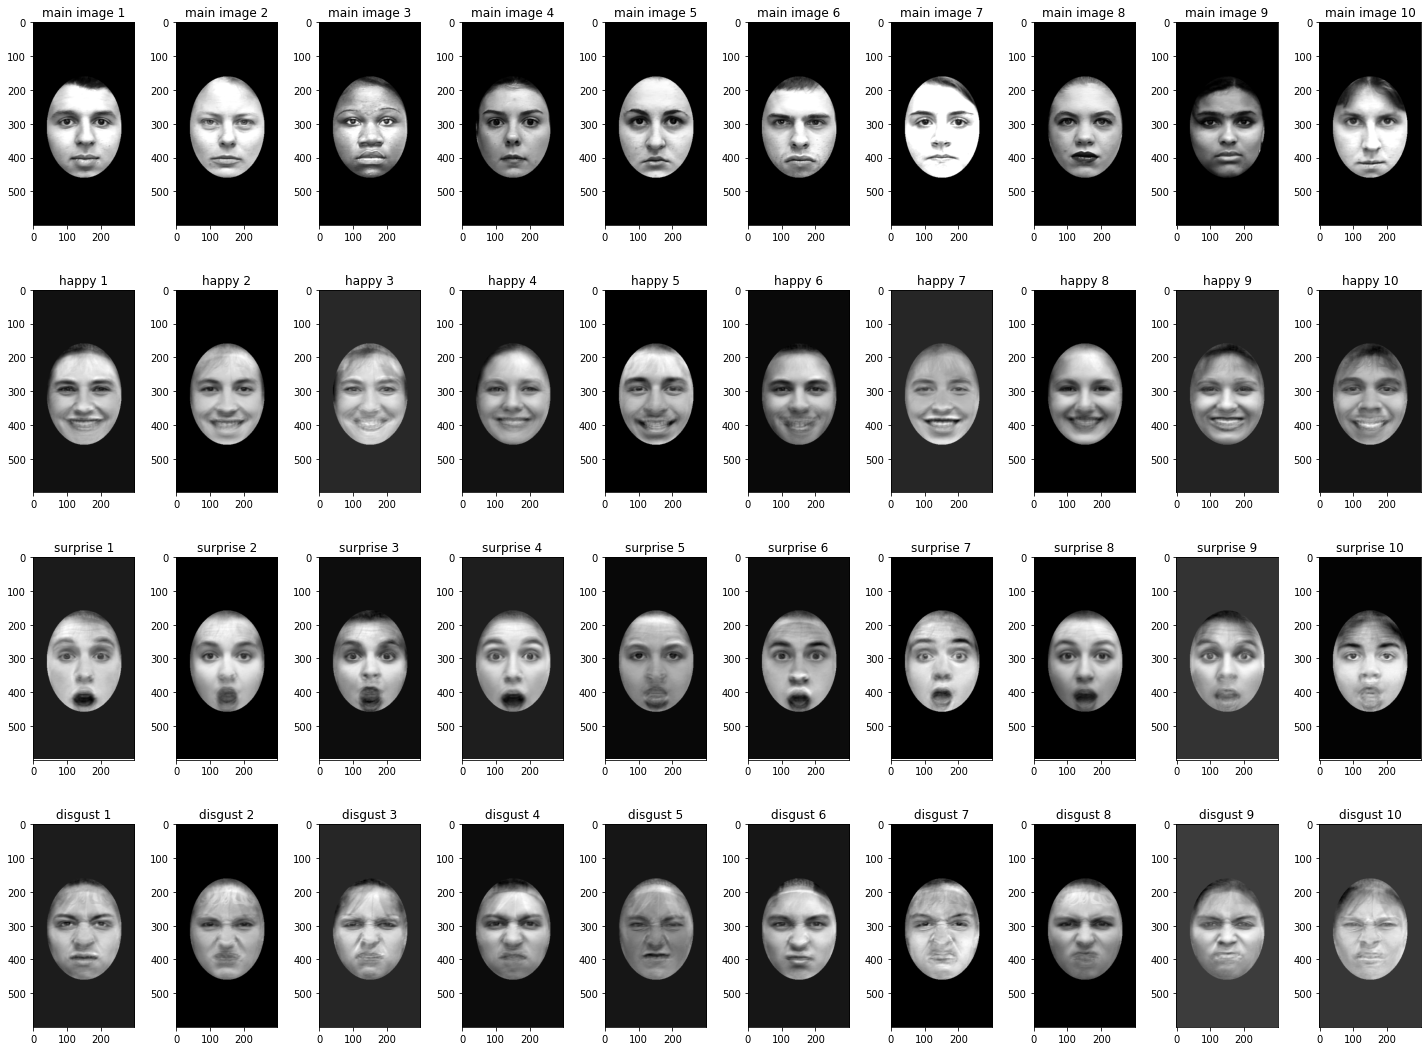

In [44]:
samples = train_neutral_set[1:100:10]
samples_reduced = pca1_neutral.transform(samples)
samples_reconstruct_happy = pca1_happy.inverse_transform(samples_reduced)
samples_reconstruct_surprise = pca1_surprise.inverse_transform(samples_reduced)
samples_reconstruct_disgust = pca1_disgust.inverse_transform(samples_reduced)

fig, axes = plt.subplots(4, 10)
fig.set_size_inches(20,15)
fig.tight_layout()

for i in range(10):
       
    sample = samples[i].reshape((rows,cols))
    plt.subplot(4, 10, i+1)
    plt.title('main image '+str(i+1))
    plt.imshow(sample, cmap='gray')
    
    
    sample_rec = samples_reconstruct_happy[i].reshape((rows,cols))
    plt.subplot(4, 10, i+11)
    plt.title('happy '+
              str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    
    sample_rec = samples_reconstruct_surprise[i].reshape((rows,cols))
    plt.subplot(4, 10, i+21)
    plt.title('surprise '+
              str(i+1))
    plt.imshow(sample_rec, cmap='gray')
    
    sample_rec = samples_reconstruct_disgust[i].reshape((rows,cols))
    plt.subplot(4, 10, i+31)
    plt.title('disgust '+
              str(i+1))
    plt.imshow(sample_rec, cmap='gray')


<div align=right>
<font face="XB Niloofar">
    
<p></p>
<font size=4>
مشاهده میشود که بیشترین اجزای صورت که دچار تغییر شده اند دهان و چشم و ابرو هستند،اما شباهت به صورت دقیق حاصل نشده است.